![](https://i.imgur.com/SF74JSW.png)

# How Does a Bike-Share Navigate Speedy Success? 
## Cyclistic Bike Share Case Study

### Introduction

This case study is a capstone project from the Google Data Analytics Professional Certificate course. I will be using Python as my tool for data analysis and visualizations. I've chose to use Jupyter Notebook to document my thought process as well as the code used. 

This case study will follow a six step analysis process:
- Ask
- Prepare
- Process
- Analyze
- Share
- Act

### Scenario

You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes dierently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

---

### <span style='color:Orange'> **Ask** </span>
What is the problem you are trying to solve?
- Converting casual riders into annual members.

How can your insights drive business decisions?
- By identifying the difference between casual riders and annual members, the marketing team will be able to design effective marketing strategies aimed at converting casual riders into annual members.

**Identify the business task**
- Analyze the differences in usage between annual members and casual riders.

---

### <span style='color:Orange'> **Prepare** </span> 
Where is the data located?
- Data used for this case study is provided by [Divvy](https://divvy-tripdata.s3.amazonaws.com/index.html), a bike-share company in Chicago.
- The data has been made available by Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement).

How is the data organized?
- The data are in csv format and they are zipped and organized by year and month.
- Additionally, the data can be categorized into two timeframes. Data from 2013 to 2020 and data from 2020 to 2023.
- Data before 2020 includes data on members' gender and birthyear.

**Download and sort the data**
- For the purpose of having an up to date view on the differences between members and casual riders, data from 2020 to 2023 will be used.
- The data was downloaded and stored locally before using Python to merge the selected timeframe into one dataframe.

In [1]:
# Change the working directory 
import os
os.chdir(r"C:\Users\LOIS\Documents\case_study\case_study1_data\2020-2022_divvy-tripdata\data")

In [2]:
# Install matplotlib
import sys
!{sys.executable} -m pip install matplotlib


[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import glob
import calendar
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
# Get CSV files list from folder
path = r"C:\Users\LOIS\Documents\case_study\case_study1_data\2020-2022_divvy-tripdata\data"
csv_files = glob.glob(path + "/*.csv")

In [5]:
# Read each CSV file into dataframe
#Create a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

In [6]:
# Concatenate all data frames
big_df = pd.concat(df_list, ignore_index=True)

---

## <span style="color:Orange"> **Process** </span>
**Check and clean the data**
- I will use the <span style="color:turquoise"> *info()* </span> and <span style="color:turquoise"> *head()* </span> function to check the columns and datatypes of the dataframe.
- The <span style="color:turquoise"> *isnull().sum()* </span> function will be used to check for null values within the dataframe. For the purpose of this casestudy, I will remove the null values from the dataframe using the <span style="color:turquoise"> *dropna()* </span> function. However, in reality, I would check with the data owner for the causes of the null values in the dataset.
- Finally, I will check for any duplicates within the dataframe using the <span style="color:turquoise"> *duplicated().any()* </span> function.


In [7]:
# Check if dataframe is successfully concatenated 
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16048417 entries, 0 to 16048416
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1.6+ GB


In [8]:
# Check dataframe
big_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


In [9]:
# Check for null values
big_df.isnull().sum()

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1859687
start_station_id      1860442
end_station_name      1999705
end_station_id        2000307
start_lat                   0
start_lng                   0
end_lat                 16454
end_lng                 16454
member_casual               0
dtype: int64

In [10]:
# Remove null values from the dataframe
big_df = big_df.dropna(how="any", axis=0)
big_df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [11]:
# Check for duplicates
big_df.duplicated().any()

False

**Transform the data**
- To calculate the <span style="color:yellow"> ride_length </span>, the data type for <span style="color:yellow"> started_at </span> and <span style="color:yellow"> ended_at </span> needs to be transformed to datetime format using Panda's <span style="color:turquoise"> *pd.to_datetime()* </span> function.
- Logically, <span style="color:yellow"> started_at </span> needs to be earlier than <span style="color:yellow"> ended_at</span>. While going through the data, it seems there are some entries where this is not true. If this were to happen in reality, I would need to get clarifications from the data owner regarding these errors. However, in this hypothetical scenerio, I've simply swapped the entries for <span style="color:yellow"> started_at </span> and <span style="color:yellow"> ended_at </span> where <span style="color:yellow"> started_at </span> is later than <span style="color:yellow"> ended_at</span>.
- A <span style="color:yellow"> ride_distance </span> column is added using a function created with the [Haversine forumula](https://en.wikipedia.org/wiki/Haversine_formula) to calculate the distance between starting and ending point.
- A <span style="color:yellow"> start_hour </span> column is added using <span style="color:turquoise"> *dt.hour* </span> to analyze when do the riders use the service during the day.
- A <span style="color:yellow"> day_of_week </span> column is added using <span style="color:turquoise"> *dt.dayofweek* </span> to analyze when are riders using the bike sharing service.
- A <span style="color:yellow"> start_month </span> column is added using <span style="color:turquoise"> *dt.month* </span> to analyze seasonality in riders' usage of the service. 

In [12]:
# Change started_at and ended_at to datetime format
big_df["started_at"] = pd.to_datetime(big_df["started_at"])
big_df["ended_at"] = pd.to_datetime(big_df["ended_at"])

In [13]:
# Create a temporary column to hold the values of 'started_at'
big_df['temp_started_at'] = big_df['started_at']

# Replace 'started_at' values with 'ended_at' values where 'started_at' is later than 'ended_at'
mask = big_df['started_at'] > big_df['ended_at']
big_df.loc[mask, 'started_at'] = big_df.loc[mask, 'ended_at']

# Replace 'ended_at' values with the original 'started_at' values using the temporary column
big_df.loc[mask, 'ended_at'] = big_df.loc[mask, 'temp_started_at']

# Remove the temporary column
big_df = big_df.drop(columns='temp_started_at')

In [14]:
# Create new column based on the difference of ending and starting time
big_df["ride_length"] = big_df["ended_at"] - big_df["started_at"]

In [15]:
# Create a function based on Haversine Formula to calculate distance
def distance(lat1, lon1,lat2, lon2):
    r = 6371 #radius of earth in km
    p = np.pi / 180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
    return 2 * r * np.arcsin(np.sqrt(a))

# Create ride_distance column to determine distance between starting and ending point
# in kilometers
big_df["ride_distance"] = distance(big_df["start_lat"], big_df["start_lng"], big_df["end_lat"], big_df["end_lng"])

In [16]:
# Create start_hour column to determine time each ride started
big_df["start_hour"] = big_df["started_at"].dt.hour

In [17]:
# Create day_of_week column to determine the day of the week each ride started
# Monday = 0, Sunday = 6
big_df["day_of_week"] = big_df["started_at"].dt.dayofweek

# Create a dictionary to map numerical values to weekday names
weekday_names = {
    0: "Mon",
    1: "Tue",
    2: "Wed",
    3: "Thu",
    4: "Fri",
    5: "Sat",
    6: "Sun"
}

# Mapping dictionary to day_of_week
big_df["day_of_week_name"] = big_df["day_of_week"].apply(lambda y:weekday_names[y])

In [18]:
# Create month column to determine the month each ride started
big_df["start_month"] = big_df["started_at"].dt.month

# create a dictionary to map numerical values to month names
month_names = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec"
}

# Mapping dictionary to start_month
big_df["start_month_name"] = big_df["start_month"].apply(lambda y:month_names[y])

---

## <span style="color:Orange"> **Analyze** </span>
To conduct a comprehensive analysis and differentiate between members and casual riders, I will examine various aspects of the dataframe, focusing on the following key areas:

- **Number of Rides**: Analyzing the ride frequency for each rider type
- **Choice of Bicycle**: Analyzing the bicycle preference among riders
- **Average Ride Distance**: Examining the typical distance covered during rides by each rider type
- **Average Ride Duration**: Assessing the average duration of rides for members and casual riders
- **Number of Rides During the Day**: Analyzing the distribution of rides throughout the day to identify daily ride patterns
- **Number of Rides During the Week**: Analyzing the ride counts accross different days of the week
- **Number of Rides During the Year**: Analyzing the trends in ride frequency over the course of the year

Through this analysis, I will be able to gain insights into the characteristics and behaviors of members and casual riders. Key Takeways from the analysis will be included at the end of this section.

**Number of Rides**
- I will be using the<span style="color:turquoise"> *groupby()* </span> and <span style="color:turquoise"> *count()* </span> function to  determine the number of rides taken for casual and member riders during April 2020 to May 2023.
- A pie chart will be used for visualizing the data.

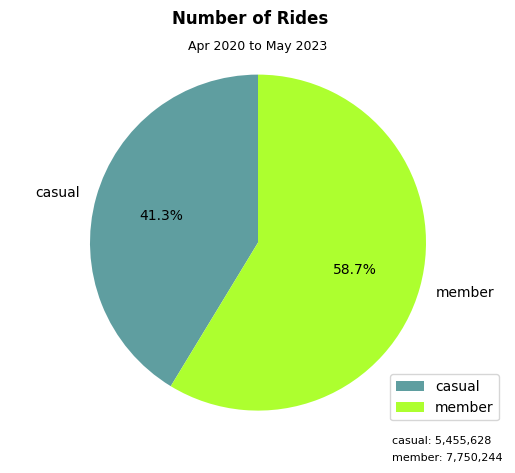

In [19]:
# Count the number of rides for each rider type
ride_count = big_df.groupby("member_casual")["ride_id"].count()

# Format ride_count with commas
format_ride_count = ride_count.apply("{:,.0f}".format)

# Define custom colors
colors = ["cadetblue","greenyellow"]

# Plotting the pie chart
plt.pie(ride_count, labels=ride_count.index, autopct="%1.1f%%", startangle=90, colors=colors)
plt.axis("equal")

# Adding the number of rides
for i, count in enumerate(ride_count):
    label = f'{format_ride_count.index[i]}: {format_ride_count[i]}'
    plt.text(0.8, -1.2 - i * 0.1, label, fontsize=8)

# Adding title and subtitles to the chart
plt.suptitle("Number of Rides", fontweight="bold")
plt.title("Apr 2020 to May 2023", fontsize=9)

# Adding a legend
legend_labels = ["casual", "member"]
plt.legend(legend_labels, loc="lower right")

# Displaying the chart
plt.show()

- Between April 2020 and May 2023, Cyclistic members took a total of approximately 7.75 million rides. Which is 58.7% of all rides taken during this duration.
- On the other hand, casual riders took a total of approximately 5.46 million rides. Which is 41.% of all rides taken during this duration.

**Choice of Bicycle**
- I will use a grouped bar chart to visualize the differences betweeen the rider types and their bicycle choice.
- The<span style="color:turquoise"> *value.counts()* </span> function will be used to calculate the number of rides per bicycle type for each rider type.

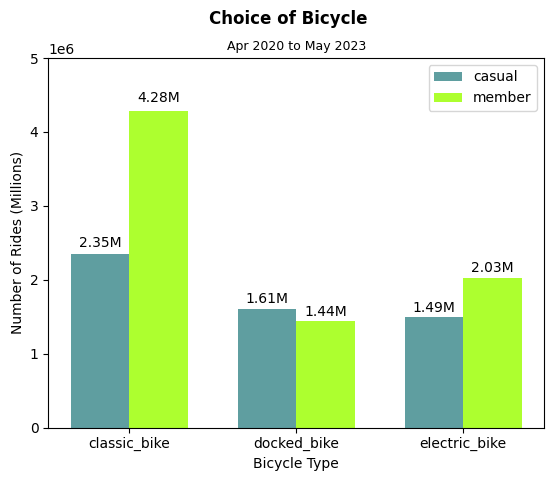

In [20]:
# Filter the dataframe for riders
casual_rider = big_df[big_df['member_casual'] == 'casual']
member_rider = big_df[big_df["member_casual"] == "member"]

# Count the number of rideable_type for riders
casual_bike_count = casual_rider['rideable_type'].value_counts().sort_index()
member_bike_count = member_rider["rideable_type"].value_counts().sort_index()

# Parameters
N = 3
ind = np.arange(N)
width = 0.35

# Adding Bars
fig, ax = plt.subplots()
bar1 = ax.bar(ind, casual_bike_count, width, color="cadetblue")
bar2 = ax.bar(ind + width, member_bike_count, width, color="greenyellow")

# Adding titles, labels
ax.set_xlabel("Bicycle Type")
ax.set_ylabel("Number of Rides (Millions)")
plt.suptitle("Choice of Bicycle", fontweight="bold")
plt.title("Apr 2020 to May 2023", fontsize=9)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(member_bike_count.index)

# Setting y-axis range
plt.ylim(0,5000000)

# Adding legend
ax.legend((bar1[0], bar2[0]), ("casual", "member"))

# Function for labels on top on bars
def autolabel(bars):
    for bar in bars:
        multiples = 1000000
        height = bar.get_height() / multiples
        ax.text(bar.get_x() + bar.get_width()/2., 1.02*height*multiples, "{:.2f}M".format(height), ha="center", va="bottom")

# Displaying the chart        
autolabel(bar1)
autolabel(bar2)
plt.show()

- The Classic Bike emerges as the preferred choice among both member and casual riders, with a total of 4.28 million rides recorded for member riders and 2.35 million rides for casual riders.
- Between the Docked Bike and Electric Bike options, there is a slight preference among casual riders for the Docked Bike, which has been utilized approximately 8% more frequently than the Electric Bike.
- Conversely, member riders exhibit a stronger inclination towards the Electric Bike, with a notable 40% higher usage compared to the Docked Bike.

**Average Ride Distance**
- I will be using bar charts to visualize the difference in average ride distance.
- I will be using the <span style="color:turquoise">groupby()</span> and <span style="color:turquoise">mean()</span> function to calculate the average ride distance for the riders.

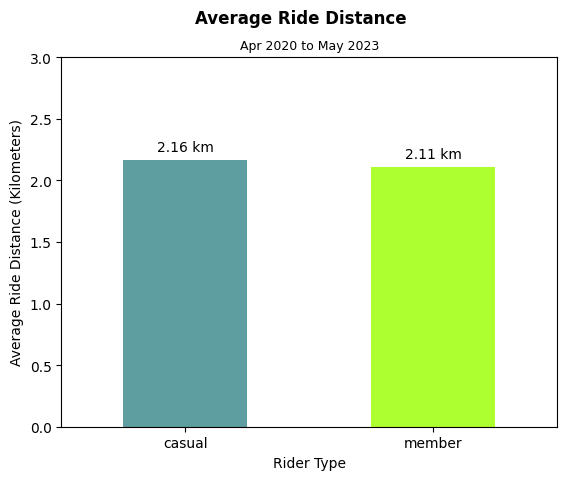

In [21]:
# Calculate average ride times for member and casual riders
# in kilometers
avg_ride_distance = big_df.groupby("member_casual")["ride_distance"].mean()

# Plotting the bar chart
ax = avg_ride_distance.plot(kind="bar", color=colors)

# Adding labels and title to the chart
plt.xlabel("Rider Type")
plt.ylabel("Average Ride Distance (Kilometers)")
plt.suptitle("Average Ride Distance", fontweight="bold")
plt.title("Apr 2020 to May 2023", fontsize=9)

# Setting the y-axis range
plt.ylim(0, 3.0)

# Rotating the x-axis labels
plt.xticks(rotation=0)

# Adding the average ride distance on top of each bar
for i, v in enumerate(avg_ride_distance):
    ax.text(i, v + 0.05, f"{round(v,2)} km", ha="center", va="bottom")

# Displaying the chart
plt.show()

- The data reveals a marginal disparity in the average ride distances between casual and member riders. Casual riders tend to cover an average distance of 2.16 kilometers, while member riders have an average distance of 2.11 kilometers.

**Average Ride Duration**
- Similarly, I will be using bar charts to visualize the difference in average ride distance.
- I will be using the <span style="color:turquoise">groupby()</span> and <span style="color:turquoise">mean()</span> function to calculate the average ride duration for the riders.

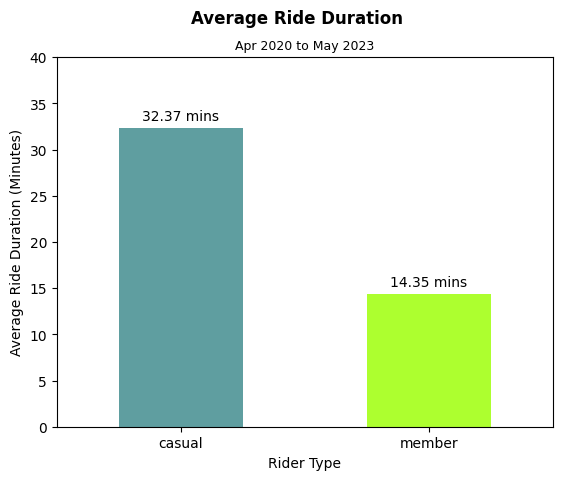

In [22]:
# Calculate average ride times for member and casual riders
avg_ride_length = big_df.groupby("member_casual")["ride_length"].mean()

# Convert average ride length to minutes
avg_ride_length_min = avg_ride_length.dt.total_seconds() / 60

# Plotting the bar chart
ax = avg_ride_length_min.plot(kind="bar", color=colors)

# Adding labels and title to the plot
plt.xlabel("Rider Type")
plt.ylabel("Average Ride Duration (Minutes)")
plt.suptitle("Average Ride Duration", fontweight="bold")
plt.title("Apr 2020 to May 2023", fontsize=9)

# Setting the y-axis range
plt.ylim(0, 40)

# Rotating x-axis labels
plt.xticks(rotation=0)

# Adding the average ride length on top of each bar
for i, v in enumerate(avg_ride_length_min):
    ax.text(i, v + 0.5, f"{round(v, 2)} mins", ha="center", va="bottom")
    
# Displaying the chart
plt.show()

- When examining the average ride duration, a contrasting pattern between casual and member riders is uncovered. Casual riders exhibit a significantly longer usage duration, with an average ride length of approximately 32 minutes, surpassing member riders who typically utilize the service for approximately 14 minutes.

**Number of Rides During the Day**
- To depict the off-peak and peak hours, the number of rides during the day will be visualized using a line chart.
- I will be using the <span style="color:turquoise">value_counts()</span> function to calculate the number of rides for each hour of the day.
- As the hour of the day is indexed differently in the dataframe, I will use a dictionary to map the appropriate timings.

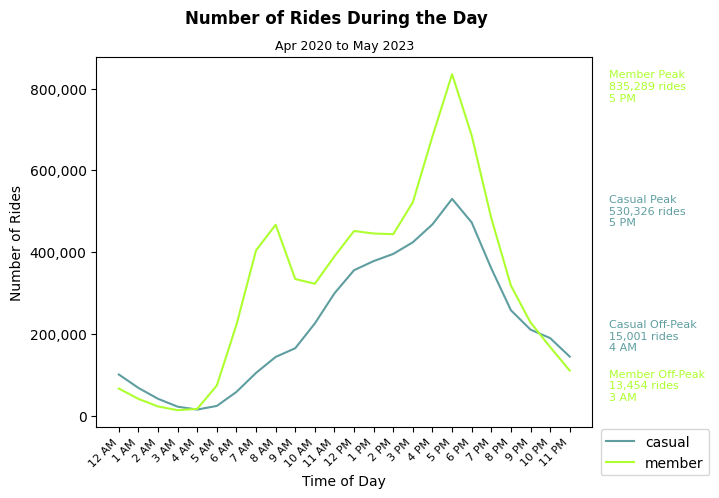

In [23]:
# Create dictionary to map time of day
time_of_day = {
    0: "12 AM",
    1: "1 AM",
    2: "2 AM",
    3: "3 AM",
    4: "4 AM",
    5: "5 AM",
    6: "6 AM",
    7: "7 AM",
    8: "8 AM",
    9: "9 AM",
    10: "10 AM",
    11: "11 AM",
    12: "12 PM",
    13: "1 PM",
    14: "2 PM",
    15: "3 PM",
    16: "4 PM",
    17: "5 PM",
    18: "6 PM",
    19: "7 PM",
    20: "8 PM",
    21: "9 PM",
    22: "10 PM",
    23: "11 PM"
}

# Calculate the number of rides for each time of day for casual and member riders
casual_rider_count = casual_rider['start_hour'].value_counts().sort_index()
member_rider_count = member_rider['start_hour'].value_counts().sort_index()

# Create the line chart
plt.plot(casual_rider_count.index, casual_rider_count.values, label='casual', color="cadetblue")
plt.plot(member_rider_count.index, member_rider_count.values, label='member', color="greenyellow")

# Set the x-axis labels to the time of day
plt.xticks(list(time_of_day.keys()), list(time_of_day.values()), rotation=45, ha="right", fontsize=8)

# Set the formatter for y-axis labels
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add labels and title to the chart
plt.xlabel("Time of Day")
plt.ylabel("Number of Rides")
plt.suptitle("Number of Rides During the Day", fontweight="bold")
plt.title("Apr 2020 to May 2023", fontsize=9)

# Add a legend
plt.legend(loc="lower right", bbox_to_anchor=(1.25, -0.15))

# Find the peak and off peak values for casual and member riders
casual_peak = casual_rider_count.max()
member_peak = member_rider_count.max()

casual_off_peak = casual_rider_count.min()
member_off_peak = member_rider_count.min()

# Find the corresponding time of day for the peaks and off peaks
casual_peak_time = time_of_day[casual_rider_count.idxmax()]
member_peak_time = time_of_day[member_rider_count.idxmax()]

casual_off_peak_time = time_of_day[casual_rider_count.idxmin()]
member_off_peak_time = time_of_day[member_rider_count.idxmin()]

# Add annotations for the peak values
plt.annotate(f"Casual Peak\n{casual_peak:,.0f} rides\n{casual_peak_time}", xy=(casual_rider_count.idxmax(), casual_peak),
             xytext=(casual_rider_count.idxmax() + 8, casual_peak - 30000), ha="left", va="center",
            color="cadetblue", fontsize=8)

plt.annotate(f"Member Peak\n{member_peak:,.0f} rides\n{member_peak_time}", xy=(member_rider_count.idxmax(), member_peak),
             xytext=(member_rider_count.idxmax() + 8, member_peak - 30000), ha="left", va="center",
            color="greenyellow", fontsize=8)

plt.annotate(f"Casual Off-Peak\n{casual_off_peak:,.0f} rides\n{casual_off_peak_time}", xy=(casual_rider_count.idxmin(), casual_off_peak),
             xytext=(casual_rider_count.idxmin() + 21, casual_off_peak + 180000), ha="left", va="center",
             color="cadetblue", fontsize=8)

plt.annotate(f"Member Off-Peak\n{member_off_peak:,.0f} rides\n{member_off_peak_time}", xy=(member_rider_count.idxmin(), member_off_peak),
             xytext=(member_rider_count.idxmin() + 22, member_off_peak + 60000), ha="left", va="center",
             color="greenyellow", fontsize=8)

# Display the chart
plt.show()

- The usage pattern of the service shows distinct off-peak timings between 11 PM to 5 AM, gradually increasing throughout the day, and reaching peak usage at 5 PM for both casual and member riders.
- Member riders show a noticeable utilization pattern with a slight morning increase followed by a peak in the evening, potentially indicating their utilization of the service for commuting to work. In contrast, casual riders exhibit a gradual rise in usage throughout the morning, reaching their peak in the evening. This divergence in patterns suggests differing usage behaviors and motivations between the two rider groups.
- At peak usage period, member riders significantly outnumber casual riders, with approximately 835,000 rides compared to approximately 530,000 rides.
- During the off-peak hours, casual riders take the lead with approximately 15,000 rides, surpassing member riders who recorded approximately 13,000 rides.

**Number of Rides During the Week**
- A grouped bar chart will be used to visualize the usage during the week. It will capture the trend of how members and casual riders utilize the service differently during the week.
- I will use <span style="color:turquoise">value_counts()</span> to calculate the number of rides per day during the week.

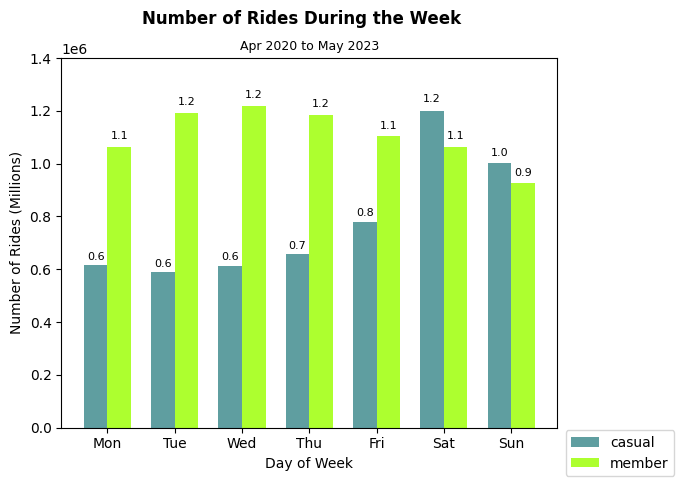

In [24]:
# Calculate the number of rides per day during the week
casual_weekly_count = casual_rider["day_of_week_name"].value_counts()
member_weekly_count = member_rider["day_of_week_name"].value_counts()

desired_week_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

casual_weekly_count = casual_weekly_count.reindex(desired_week_order)
member_weekly_count = member_weekly_count.reindex(desired_week_order)

# Parameters
N = 7
ind = np.arange(N)
width = 0.35

# Adding Bars
fig, ax = plt.subplots()
bar1 = ax.bar(ind, casual_weekly_count, width, color="cadetblue")
bar2 = ax.bar(ind + width, member_weekly_count, width, color="greenyellow")

# Adding titles, labels
ax.set_xlabel("Day of Week")
ax.set_ylabel("Number of Rides (Millions)")
plt.suptitle("Number of Rides During the Week", fontweight="bold")
plt.title("Apr 2020 to May 2023", fontsize=9)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(casual_weekly_count.index)

# Setting y-axis range
plt.ylim(0, 1400000)

# Adding legend
ax.legend((bar1[0], bar2[0]), ("casual", "member"), loc="lower right", bbox_to_anchor=(1.25, -0.15))

# Function for labels on top on bars
def autolabel(bars):
    for bar in bars:
        multiples = 1000000
        height = bar.get_height() / multiples
        ax.text(bar.get_x() + bar.get_width()/2., 1.02*height*multiples, "{:.1f}".format(height), ha="center", va="bottom", fontsize=8)

# Displaying the chart        
autolabel(bar1)
autolabel(bar2)
plt.show()


- The analysis of number of rides during the week reveals distinct behaviors between casual and member riders. Member riders demonstrate higher utilization rates on weekdays, before decreasing during weekends. On the other hand, casual riders exhibit lower usage levels on weekdays, followed by an upsurge in activity during weekends.
- Saturday emerges as the most popular day of the week for riders, with the highest number of rides recorded.
- For casual riders, Saturday stands out as the peak usage day, whereas member riders show a usage peak in the midweek period, typically between Tuesday and Thursday.


**Number of Rides During the Year**
- Finally, I will be also be using a grouped bar chart to visualize the number of rides during the year.
- I will also be using <span style="color:turquoise">value_counts()</span> to calculate the number of rides per month during the year.

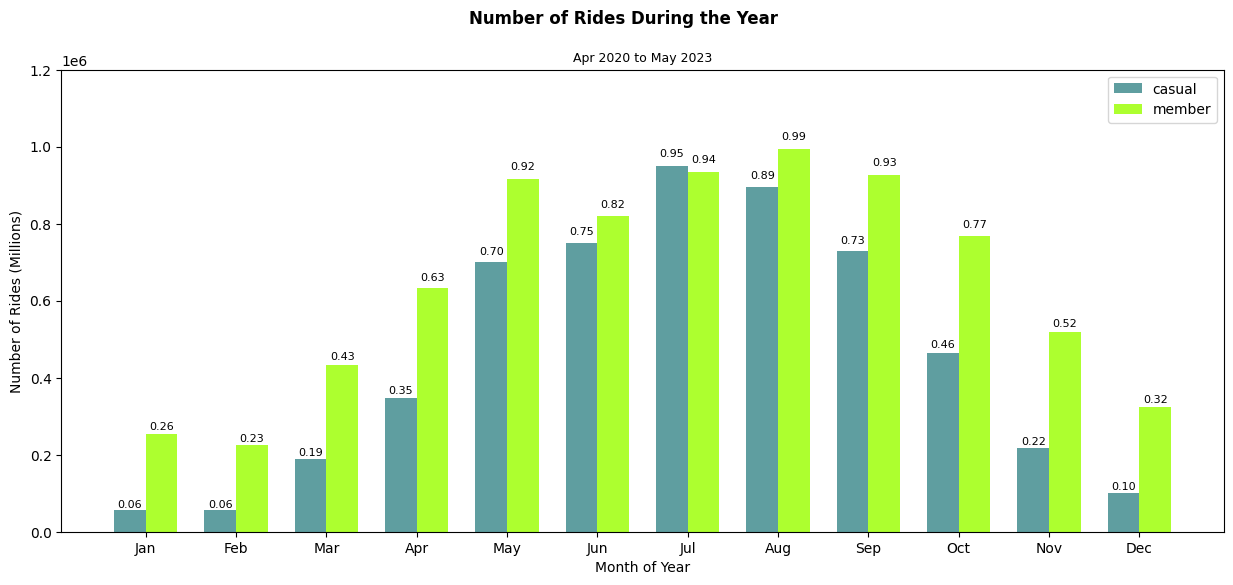

In [25]:
# Calculate the number of rides per month during the year
casual_monthly_count = casual_rider["start_month_name"].value_counts()
member_monthly_count = member_rider["start_month_name"].value_counts()

desired_month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

casual_monthly_count = casual_monthly_count.reindex(desired_month_order)
member_monthly_count = member_monthly_count.reindex(desired_month_order)

# Parameters
N = 12
ind = np.arange(N)
width = 0.35

# Adding Bars
fig, ax = plt.subplots(figsize=(15, 6))
bar1 = ax.bar(ind, casual_monthly_count, width, color="cadetblue")
bar2 = ax.bar(ind + width, member_monthly_count, width, color="greenyellow")

# Adding titles, labels
ax.set_xlabel("Month of Year")
ax.set_ylabel("Number of Rides (Millions)")
plt.suptitle("Number of Rides During the Year", fontweight="bold")
plt.title("Apr 2020 to May 2023", fontsize=9)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(casual_monthly_count.index)

# Setting y-axis range
plt.ylim(0, 1200000)

# Adding legend
ax.legend((bar1[0], bar2[0]), ("casual", "member"))

# Function for labels on top on bars
def autolabel(bars):
    for bar in bars:
        multiples = 1000000
        height = bar.get_height() / multiples
        ax.text(bar.get_x() + bar.get_width()/2., 1.02*height*multiples, "{:.2f}".format(height), ha="center", va="bottom", fontsize=8)

# Displaying the chart        
autolabel(bar1)
autolabel(bar2)
plt.show()


- Both casual and member riders exhibit increased usage of the service during the mid-year period, aligning with seasonal trends. Usage tends to peak for casual riders in July, while member riders reach their peak in August.

### **Key Takeaway**
- Between April 2020 and May 2023, members took more rides as compared to casual riders.
- The Classic bike stands as the favored option for both casual and member riders, though there is a notable preference among casual riders for the docked bike over the electric bike in comparison to member riders.
- Even though the average ride distance is similar between both casual and member riders, casual riders tend to utilize the service for a longer duration.
- Peak hours for the service tend to be in the evening.
- Casual riders utilize the service more during the weekends while member riders utilize the service more during the weekdays.
- Saturday is the most popular day.
- The utilization of the service experiences an upward trend during the summer months, followed by a gradual decline as the seasons transition.

---


## <span style="color:Orange"> **Share** </span>

I've consolidated the data visualizations and created a dashboard using Tableau. The dashboard provides an overview on the analysis done on the data set. You can view the dashboard [here](https://public.tableau.com/app/profile/louislhc).

---

## <span style="color:Orange"> **Act** </span>

### **Recommendations**
- Marketing campaigns should be initated during summer since it has the peak usage during the year. 
- Promotions/weekend passes can be provided during weekends when casual riders tend to utilize the service the most.
- Promotions should also be focused on classic and docked bikes. 